In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [98]:
df.drop(columns='Id', inplace=True)

In [99]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [100]:
mappings = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}
df['Species'] = df['Species'].map(mappings)

In [101]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [102]:
df.duplicated().sum()

np.int64(3)

<Axes: >

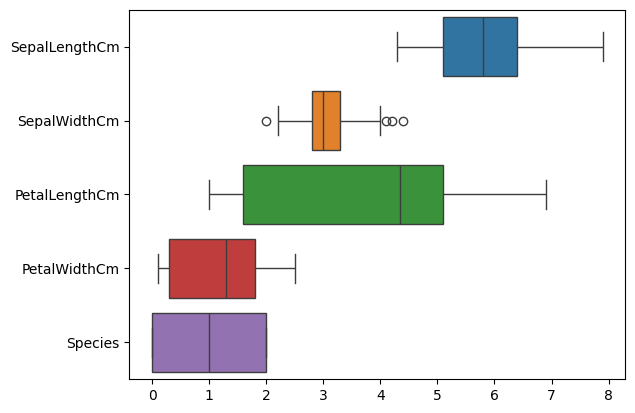

In [103]:
sns.boxplot(df, orient='h')

In [104]:
q1 = df['SepalWidthCm'].quantile(0.25)
q3 = df['SepalWidthCm'].quantile(0.75)
iqr = q3 - q1
lwr = q1 - 1.5 * iqr
upr = q3 + 1.5 * iqr
mean_value = df['SepalWidthCm'].mean()
df['SepalWidthCm'] = df['SepalWidthCm'].apply(lambda x : mean_value if x < lwr or x > upr else x)

<Axes: >

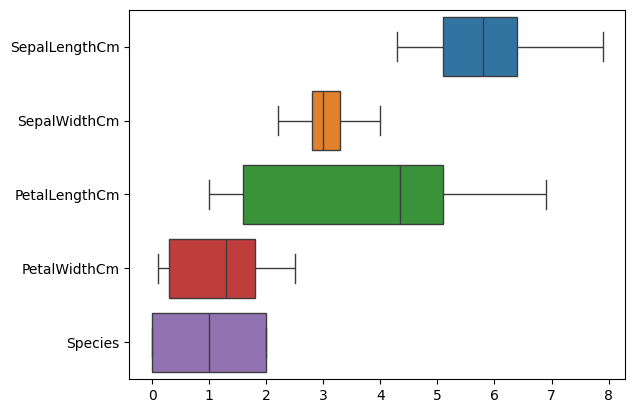

In [105]:
sns.boxplot(df, orient='h')

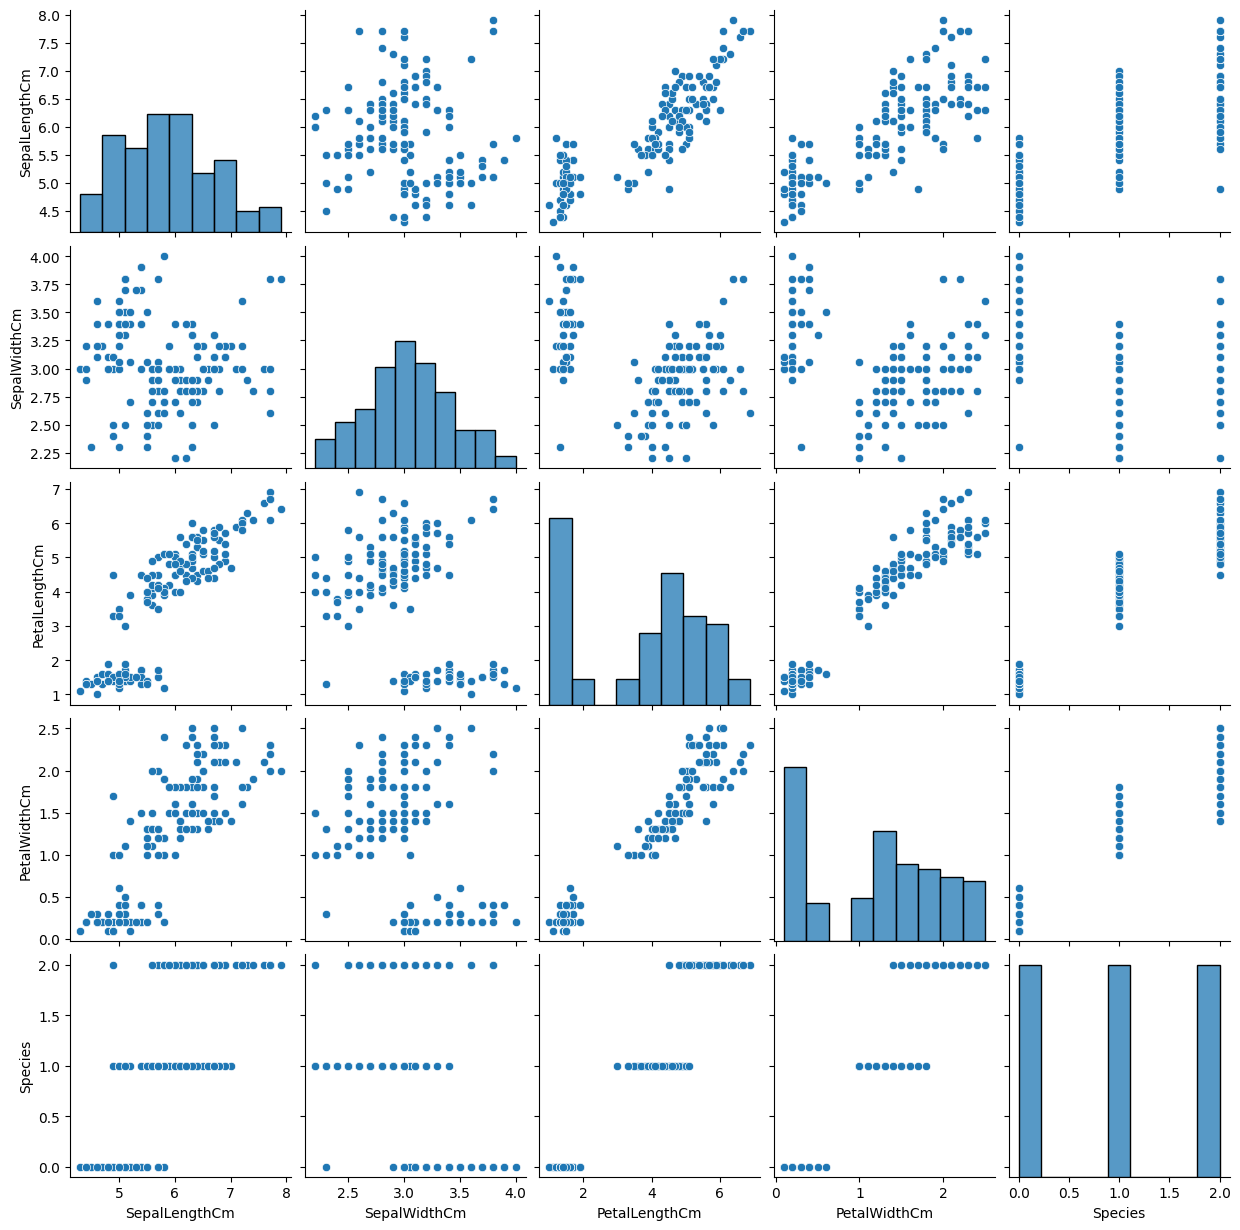

In [106]:
sns.pairplot(df)

<Axes: >

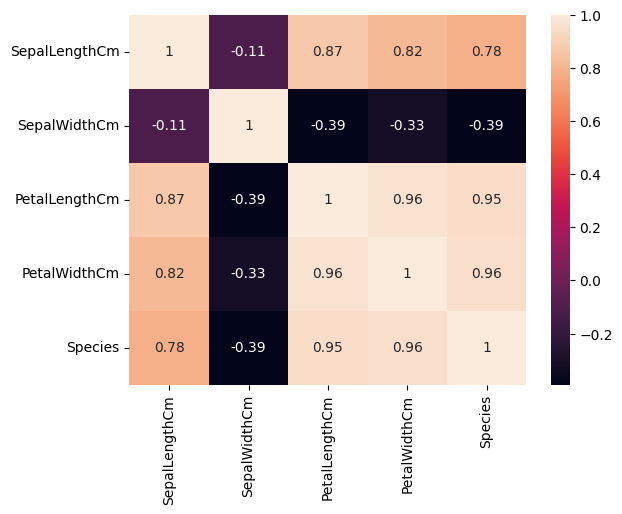

In [107]:
sns.heatmap(df.corr(), annot=True)

In [108]:
x = df.drop(columns='Species').values

In [109]:
x

array([[5.1  , 3.5  , 1.4  , 0.2  ],
       [4.9  , 3.   , 1.4  , 0.2  ],
       [4.7  , 3.2  , 1.3  , 0.2  ],
       [4.6  , 3.1  , 1.5  , 0.2  ],
       [5.   , 3.6  , 1.4  , 0.2  ],
       [5.4  , 3.9  , 1.7  , 0.4  ],
       [4.6  , 3.4  , 1.4  , 0.3  ],
       [5.   , 3.4  , 1.5  , 0.2  ],
       [4.4  , 2.9  , 1.4  , 0.2  ],
       [4.9  , 3.1  , 1.5  , 0.1  ],
       [5.4  , 3.7  , 1.5  , 0.2  ],
       [4.8  , 3.4  , 1.6  , 0.2  ],
       [4.8  , 3.   , 1.4  , 0.1  ],
       [4.3  , 3.   , 1.1  , 0.1  ],
       [5.8  , 4.   , 1.2  , 0.2  ],
       [5.7  , 3.054, 1.5  , 0.4  ],
       [5.4  , 3.9  , 1.3  , 0.4  ],
       [5.1  , 3.5  , 1.4  , 0.3  ],
       [5.7  , 3.8  , 1.7  , 0.3  ],
       [5.1  , 3.8  , 1.5  , 0.3  ],
       [5.4  , 3.4  , 1.7  , 0.2  ],
       [5.1  , 3.7  , 1.5  , 0.4  ],
       [4.6  , 3.6  , 1.   , 0.2  ],
       [5.1  , 3.3  , 1.7  , 0.5  ],
       [4.8  , 3.4  , 1.9  , 0.2  ],
       [5.   , 3.   , 1.6  , 0.2  ],
       [5.   , 3.4  , 1.6  , 0.4  ],
 

In [110]:
np.random.seed(0)
train_size = int(len(x) * 0.8)
idx = np.random.permutation(len(x))

x_train, x_test = x[idx[:train_size]], x[idx[train_size:]]

print(x_train.shape)
print(x_test.shape)

(120, 4)
(30, 4)


In [111]:
min_value = x_train.min(axis=0)
max_value = x_train.max(axis=0)
range_value = max_value - min_value
range_value[range_value == 0] = 1
x_train = (x_train - min_value) / range_value

In [112]:
x_train

array([[0.41666667, 0.35294118, 0.69491525, 0.95833333],
       [0.47222222, 0.        , 0.50847458, 0.375     ],
       [0.33333333, 0.50235294, 0.06779661, 0.04166667],
       [0.83333333, 0.41176471, 0.89830508, 0.70833333],
       [0.19444444, 0.70588235, 0.08474576, 0.04166667],
       [0.55555556, 0.64705882, 0.84745763, 1.        ],
       [0.19444444, 0.76470588, 0.05084746, 0.08333333],
       [0.66666667, 0.52941176, 0.62711864, 0.58333333],
       [0.69444444, 0.35294118, 0.6440678 , 0.54166667],
       [0.5       , 0.35294118, 0.50847458, 0.5       ],
       [0.5       , 0.23529412, 0.77966102, 0.54166667],
       [0.58333333, 0.58823529, 0.59322034, 0.58333333],
       [0.5       , 0.35294118, 0.62711864, 0.45833333],
       [0.61111111, 0.35294118, 0.61016949, 0.58333333],
       [0.5       , 0.41176471, 0.62711864, 0.54166667],
       [0.16666667, 0.52941176, 0.08474576, 0.        ],
       [0.47222222, 0.41176471, 0.59322034, 0.58333333],
       [0.33333333, 0.23529412,

In [113]:
x_test = (x_test - min_value) / range_value

In [114]:
x_test

array([[0.41666667, 1.05882353, 0.03389831, 0.04166667],
       [0.94444444, 0.35294118, 0.96610169, 0.79166667],
       [0.22222222, 0.94117647, 0.08474576, 0.08333333],
       [0.11111111, 0.58823529, 0.10169492, 0.04166667],
       [0.86111111, 0.35294118, 0.86440678, 0.75      ],
       [0.19444444, 0.64705882, 0.06779661, 0.04166667],
       [0.55555556, 0.70588235, 0.77966102, 0.95833333],
       [0.38888889, 0.35294118, 0.52542373, 0.5       ],
       [0.41666667, 0.29411765, 0.49152542, 0.45833333],
       [0.38888889, 0.23529412, 0.42372881, 0.375     ],
       [0.58333333, 0.58823529, 0.72881356, 0.91666667],
       [0.66666667, 0.47058824, 0.71186441, 0.91666667],
       [0.55555556, 0.17647059, 0.66101695, 0.58333333],
       [0.66666667, 0.47058824, 0.6779661 , 0.66666667],
       [0.19444444, 0.47058824, 0.10169492, 0.04166667],
       [0.33333333, 0.11764706, 0.45762712, 0.375     ],
       [0.66666667, 0.52941176, 0.77966102, 0.95833333],
       [0.41666667, 0.29411765,

In [115]:
def pca(df):
    cov_matrix = np.cov(df.T)
    eig_val, eig_vec = np.linalg.eig(cov_matrix)
    sorted = np.argsort(eig_val)[::-1]
    sorted_eig_val = eig_val[sorted]
    sorted_eig_vec = eig_vec[:, sorted]
    total_var = np.sum(eig_val)
    cumul_var = np.cumsum(eig_val) / total_var
    n_components = np.argmax(cumul_var >= 0.9) + 1
    selected_eig_vec = eig_vec[:, :n_components]
    pca_df = np.dot(df, selected_eig_vec)
    return pca_df, n_components, selected_eig_vec

In [116]:
pca_train, n_components, selected_eig_vec = pca(x_train)

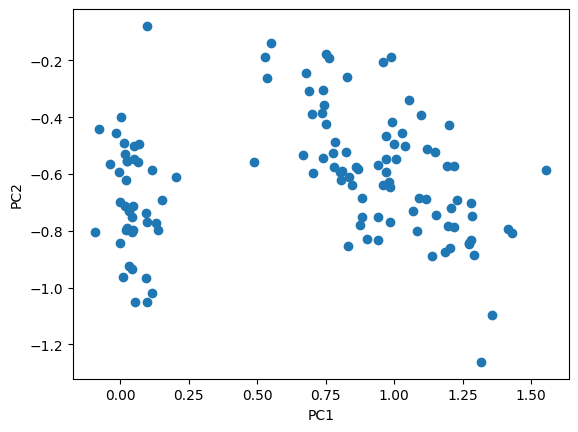

In [117]:
plt.scatter(pca_train[:, 0], pca_train[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [118]:
pca_test = np.dot(x_test, selected_eig_vec)

In [119]:
pca_test

array([[ 0.02688263, -1.13784245],
       [ 1.43338566, -0.68927979],
       [ 0.02449413, -0.96440256],
       [ 0.0267779 , -0.59296349],
       [ 1.30911235, -0.65923085],
       [ 0.03026681, -0.67612768],
       [ 1.19612551, -0.90021926],
       [ 0.7414977 , -0.48836544],
       [ 0.71665136, -0.44008373],
       [ 0.62083758, -0.371065  ],
       [ 1.17180871, -0.79656372],
       [ 1.21845935, -0.71364519],
       [ 0.98123965, -0.38233213],
       [ 1.03738062, -0.70059779],
       [ 0.08382182, -0.51005465],
       [ 0.64000424, -0.24180981],
       [ 1.27582501, -0.77121944],
       [ 1.02837822, -0.4553994 ],
       [ 0.04147004, -0.74077466],
       [ 0.88813611, -0.62723638],
       [ 0.7079193 , -0.58982057],
       [ 0.92760171, -0.73929283],
       [ 0.89768817, -0.26721272],
       [ 0.05669171, -0.83321201],
       [ 0.06213231, -0.91120975],
       [ 0.0240576 , -0.55396461],
       [ 1.09044742, -0.61037056],
       [ 0.68400718, -0.43576045],
       [ 1.37758822,

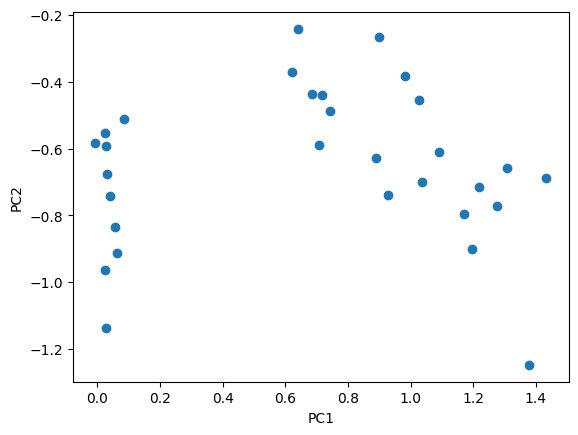

In [120]:
plt.scatter(pca_test[:, 0], pca_test[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()